In [175]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [176]:
file = '/content/drive/My Drive/Colab Notebooks/example_data.csv'

In [177]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [178]:
def pvalue_function(mu, sigma, samp_size, samp_mean=0, deltam=0):
    np.random.seed(1234)
    s1 = np.random.normal(mu, sigma, samp_size)
    if samp_mean > 0:
        print(len(s1[s1>samp_mean]))
        outliers = float(len(s1[s1>samp_mean])*100)/float(len(s1))
        print('Percentage of numbers larger than {} is {}%'.format(samp_mean, outliers))
    if deltam == 0:
        deltam = abs(mu-samp_mean)
    if deltam > 0 :
        outliers = (float(len(s1[s1>(mu+deltam)]))
                    +float(len(s1[s1<(mu-deltam)])))*100.0/float(len(s1))
        print('Percentage of numbers further than the population mean of {} by +/-{} is {}%'.format(mu, deltam, outliers))

    fig, ax = plt.subplots(figsize=(8,8))
    fig.suptitle('Normal Distribution: population_mean={}'.format(mu) )
    plt.hist(s1)
    plt.axvline(x=mu+deltam, color='red')
    plt.axvline(x=mu-deltam, color='green')
    plt.show()

In [179]:
df = pd.read_csv(file)
df

,id,gender,group,attendance_before_int,attendance_after_int,achv_before_int,achv_after_int
0,1,m,t,41,56,46,54
1,2,f,c,31,40,38,55
2,3,f,t,27,30,36,55
3,4,f,t,51,58,48,71
4,5,m,c,57,50,62,69
...,...,...,...,...,...,...,...
116,117,m,t,33,34,44,47
117,118,f,t,39,46,49,55
118,119,m,c,43,48,62,68
119,120,f,t,39,38,45,67


In [180]:
df = df[(df.attendance_before_int < 110) & (df.attendance_before_int > 0)]
df = df[(df.attendance_after_int < 110) & (df.attendance_after_int > 0)]
df = df[(df.achv_before_int < 110) & (df.achv_before_int > 0)]
df = df[(df.achv_after_int < 110) & (df.achv_after_int > 0)]
df

,id,gender,group,attendance_before_int,attendance_after_int,achv_before_int,achv_after_int
0,1,m,t,41,56,46,54
1,2,f,c,31,40,38,55
2,3,f,t,27,30,36,55
3,4,f,t,51,58,48,71
4,5,m,c,57,50,62,69
...,...,...,...,...,...,...,...
116,117,m,t,33,34,44,47
117,118,f,t,39,46,49,55
118,119,m,c,43,48,62,68
119,120,f,t,39,38,45,67


In [181]:
df_male = copy.deepcopy(df[df.gender == 'm'])
df_male.reset_index(drop=True, inplace=True)
df_female = copy.deepcopy(df[df.gender == 'f'])
df_female.reset_index(drop=True, inplace=True)
df_male

,id,gender,group,attendance_before_int,attendance_after_int,achv_before_int,achv_after_int
0,1,m,t,41,56,46,54
1,5,m,c,57,50,62,69
2,8,m,t,49,62,52,69
3,10,m,t,55,60,66,77
4,12,m,t,47,46,67,84
...,...,...,...,...,...,...,...
63,113,m,t,67,74,71,84
64,114,m,t,53,54,67,82
65,117,m,t,33,34,44,47
66,119,m,c,43,48,62,68


In [182]:
df_male_control = copy.deepcopy(df_male[df_male.group == 'c'])
df_male_treatment = copy.deepcopy(df_male[df_male.group == 't'])
df_male_control.reset_index(drop=True, inplace=True)
df_male_treatment.reset_index(drop=True, inplace=True)

df_female_control = copy.deepcopy(df_female[df_female.group == 'c'])
df_female_treatment = copy.deepcopy(df_female[df_female.group == 't'])
df_female_control.reset_index(drop=True, inplace=True)
df_female_treatment.reset_index(drop=True, inplace=True)

df_male_treatment

,id,gender,group,attendance_before_int,attendance_after_int,achv_before_int,achv_after_int
0,1,m,t,41,56,46,54
1,8,m,t,49,62,52,69
2,10,m,t,55,60,66,77
3,12,m,t,47,46,67,84
4,15,m,t,37,34,54,72
5,16,m,t,61,60,73,81
6,21,m,t,51,70,54,59
7,23,m,t,55,62,52,77
8,30,m,t,59,72,79,100
9,32,m,t,53,52,57,63


In [183]:
print("Mean of attendance_before_int for male control group: ", df_male_control['attendance_before_int'].mean())
print("Standard Deviation of attendance_before_int for male control group: ", np.std(df_male_control['attendance_before_int']))
print("Mean of attendance_after_int for male control group: ", df_male_control['attendance_after_int'].mean())
print("Standard Deviation of attendance_after_int for male control group: ", np.std(df_male_control['attendance_after_int']))
print("Mean of attendance_before_int for male treatment group: ", df_male_treatment['attendance_before_int'].mean())
print("Standard Deviation of attendance_before_int for male treatment group: ", np.std(df_male_treatment['attendance_before_int']))
print("Mean of attendance_after_int for male treatment group: ", df_male_treatment['attendance_after_int'].mean())
print("Standard Deviation of attendance_after_int for male treatment group: ", np.std(df_male_treatment['attendance_after_int']))

Mean of attendance_before_int for male control group:  47.5
Standard Deviation of attendance_before_int for male control group:  11.258330249197702
Mean of attendance_after_int for male control group:  46.6875
Standard Deviation of attendance_after_int for male control group:  11.419384560912203
Mean of attendance_before_int for male treatment group:  49.611111111111114
Standard Deviation of attendance_before_int for male treatment group:  10.06445278574763
Mean of attendance_after_int for male treatment group:  55.0
Standard Deviation of attendance_after_int for male treatment group:  11.723670263379317


In [184]:
print("Mean of achv_before_int for male control group: ", df_male_control['achv_before_int'].mean())
print("Standard Deviation of achv_before_int for male control group: ", np.std(df_male_control['achv_before_int']))
print("Mean of achv_after_int for male control group: ", df_male_control['achv_after_int'].mean())
print("Standard Deviation of achv_after_int for male control group: ", np.std(df_male_control['achv_after_int']))
print("Mean of achv_before_int for male treatment group: ", df_male_treatment['achv_before_int'].mean())
print("Standard Deviation of achv_before_int for male treatment group: ", np.std(df_male_treatment['achv_before_int']))
print("Mean of achv_after_int for male treatment group: ", df_male_treatment['achv_after_int'].mean())
print("Standard Deviation of achv_after_int for male treatment group: ", np.std(df_male_treatment['achv_after_int']))

Mean of achv_before_int for male control group:  59.4375
Standard Deviation of achv_before_int for male control group:  9.597973418904639
Mean of achv_after_int for male control group:  72.8125
Standard Deviation of achv_after_int for male control group:  12.67240481321521
Mean of achv_before_int for male treatment group:  60.361111111111114
Standard Deviation of achv_before_int for male treatment group:  9.767158058678579
Mean of achv_after_int for male treatment group:  73.88888888888889
Standard Deviation of achv_after_int for male treatment group:  13.054964525629018


In [185]:
print("Mean of attendance_before_int for female control group: ", df_female_control['attendance_before_int'].mean())
print("Standard Deviation of attendance_before_int for female control group: ", np.std(df_female_control['attendance_before_int']))
print("Mean of attendance_after_int for female control group: ", df_female_control['attendance_after_int'].mean())
print("Standard Deviation of attendance_after_int for female control group: ", np.std(df_female_control['attendance_after_int']))
print("Mean of attendance_before_int for female treatment group: ", df_female_treatment['attendance_before_int'].mean())
print("Standard Deviation of attendance_before_int for female treatment group: ", np.std(df_female_treatment['attendance_before_int']))
print("Mean of attendance_after_int for female treatment group: ", df_female_treatment['attendance_after_int'].mean())
print("Standard Deviation of attendance_after_int for female treatment group: ", np.std(df_female_treatment['attendance_after_int']))

Mean of attendance_before_int for female control group:  46.13333333333333
Standard Deviation of attendance_before_int for female control group:  9.587260065084058
Mean of attendance_after_int for female control group:  41.733333333333334
Standard Deviation of attendance_after_int for female control group:  12.347559362976241
Mean of attendance_before_int for female treatment group:  49.45454545454545
Standard Deviation of attendance_before_int for female treatment group:  9.064051235148025
Mean of attendance_after_int for female treatment group:  53.81818181818182
Standard Deviation of attendance_after_int for female treatment group:  12.633420193483788


In [186]:
print("Mean of achv_before_int for female control group: ", df_female_control['achv_before_int'].mean())
print("Standard Deviation of achv_before_int for female control group: ", np.std(df_female_control['achv_before_int']))
print("Mean of achv_after_int for female control group: ", df_female_control['achv_after_int'].mean())
print("Standard Deviation of achv_after_int for female control group: ", np.std(df_female_control['achv_after_int']))
print("Mean of achv_before_int for female treatment group: ", df_female_treatment['achv_before_int'].mean())
print("Standard Deviation of achv_before_int for female treatment group: ", np.std(df_female_treatment['achv_before_int']))
print("Mean of achv_after_int for female treatment group: ", df_female_treatment['achv_after_int'].mean())
print("Standard Deviation of achv_after_int for female treatment group: ", np.std(df_female_treatment['achv_after_int']))

Mean of achv_before_int for female control group:  52.0
Standard Deviation of achv_before_int for female control group:  8.858141264772575
Mean of achv_after_int for female control group:  63.06666666666667
Standard Deviation of achv_after_int for female control group:  12.902023958364914
Mean of achv_before_int for female treatment group:  51.77272727272727
Standard Deviation of achv_before_int for female treatment group:  7.827293844338529
Mean of achv_after_int for female treatment group:  67.36363636363636
Standard Deviation of achv_after_int for female treatment group:  8.434482548904146


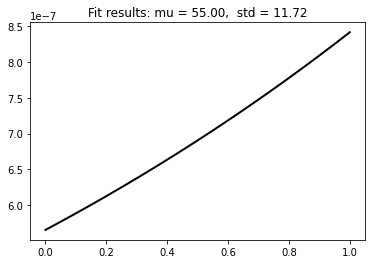

In [187]:
data = list(df_male_treatment['attendance_after_int'])
mu, std = norm.fit(data)
#plt.hist(data, bins=5, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [188]:
stats.ttest_ind(a=df_male_control['attendance_after_int'],b=df_male_treatment['attendance_after_int'],equal_var=False)

Ttest_indResult(statistic=-2.9146916709902677, pvalue=0.004870055779990997)

In [189]:
stats.ttest_ind(a=df_female_control['attendance_after_int'],b=df_female_treatment['attendance_after_int'],equal_var=False)

Ttest_indResult(statistic=-3.3702596299252785, pvalue=0.0015577057023480178)

In [190]:
stats.ttest_ind(a=df_male_control['achv_after_int'],b=df_male_treatment['achv_after_int'],equal_var=False)

Ttest_indResult(statistic=-0.339539547298364, pvalue=0.7352904664104722)

In [191]:
stats.ttest_ind(a=df_female_control['achv_after_int'],b=df_female_treatment['achv_after_int'],equal_var=False)

Ttest_indResult(statistic=-1.4222670647188163, pvalue=0.16121802316775208)